# Commodity skewness

This notebook analyses commodity cross-sectional skewness strategy. The strategy takes long positions on contracts with most negative historical skewness and short positions on ones with most positive skewness.

In [1]:
%matplotlib inline
from datetime import datetime
import logging
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.style.use('bmh')

from vivace.backtest import signal
from vivace.backtest import processing
from vivace.backtest.contract import all_futures_hollstein2020
from vivace.backtest.engine import BacktestEngine
from vivace.backtest.enums import Strategy
from vivace.backtest.stats import Performance

# Data

26 commodity futures are used as per Hollstein 2020.

In [2]:
all_futures_hollstein2020

,name
ticker,
CO,Brent Crude Oil
CC,Cocoa
KC,Coffee
C,Corn
CT,Cotton
FC,Feeder Cattle
GC,Gold
HO,Heating Oil
HG,Copper


In [3]:
all_futures_hollstein2020.shape

(26, 1)

# Performance

## Run backtest

A simple portfolio is constructed by using trailing 1-year returns of each commodity futures. Unlike studies in equities, the recent 1-month is included in the formation period. Positions are rebalanced on a monthly basis.

Similar to other popular academic strategies, this commodity momentum signal has been stalling since around 2015.

In [4]:
engine = BacktestEngine(
    strategy=Strategy.DELTA_ONE.value,
    instrument=all_futures_hollstein2020.index,
    signal=signal.XSSkewness(lookback=252, 
                             post_process=processing.Pipeline([
                                 processing.Negate(),
                                 processing.AsFreq(freq='m', method='pad')
                             ])),
    log_level=logging.WARN,
)
engine.run()

In [5]:
portfolio_return = (engine.calculate_equity_curve(calculate_net=False)
                    .rename('Commodity skewness portfolio'))

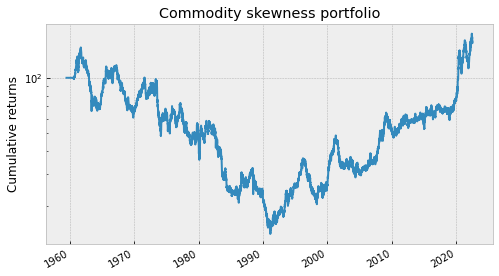

In [6]:
fig, ax = plt.subplots(figsize=(8, 4.5))
portfolio_return.plot(ax=ax, logy=True);
ax.set_title('Commodity skewness portfolio')
ax.set_ylabel('Cumulative returns');

In [7]:
portfolio_return.pipe(Performance).summary()

,Commodity skewness portfolio
CAGR,0.007103
Annualised vol,0.157669
Sharpe ratio,0.045052
Max drawdown,0.903528
Calmar ratio,0.007862
Skewness,-0.056652
Kurtosis,2.166641
Worst return,-0.072093
Worst 1d return,-0.072093
Worst 1w return,-0.109418


## Post publication

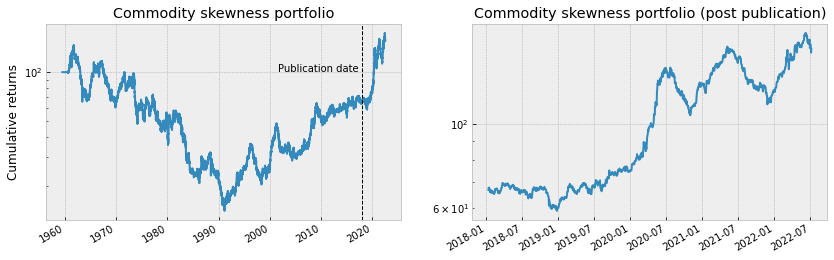

In [8]:
publication_date = datetime(2018, 1, 11)

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
portfolio_return.plot(ax=ax[0], logy=True);
ax[0].set_title('Commodity skewness portfolio')
ax[0].set_ylabel('Cumulative returns');
ax[0].axvline(publication_date, lw=1, ls='--', color='black')
ax[0].text(publication_date, 100, 'Publication date ', ha='right')

portfolio_return.loc[publication_date:].plot(ax=ax[1], logy=True);
ax[1].set_title('Commodity skewness portfolio (post publication)');

Fernandez-Perez et al (2018) only uses data between 1987 and 2014. And in fact the chart below looks better than the full sample period. This result suggests that the skewness signal is weaker than others (e.g., trend, carry) even if it's a priced risk.

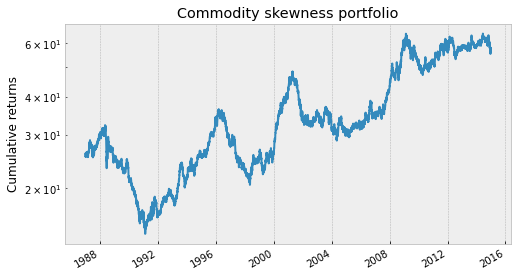

In [9]:
fig, ax = plt.subplots(figsize=(8, 4.5))
portfolio_return['1987':'2014'].plot(ax=ax, logy=True);
ax.set_title('Commodity skewness portfolio')
ax.set_ylabel('Cumulative returns');

## Recent performance

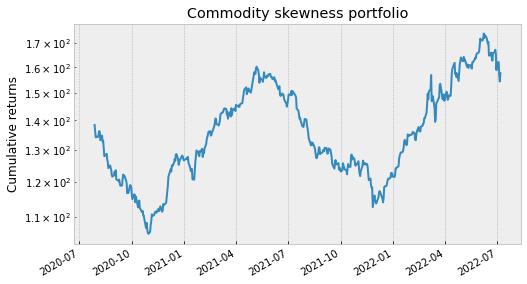

In [10]:
fig, ax = plt.subplots(figsize=(8, 4.5))
portfolio_return.tail(252 * 2).plot(ax=ax, logy=True);
ax.set_title('Commodity skewness portfolio')
ax.set_ylabel('Cumulative returns');

# Reference
- Baltas, N. and Salinas, G., 2019. Cross-Asset Skew. Available at SSRN.
- Fernandez-Perez, A., Frijns, B., Fuertes, A.M. and Miffre, J., 2018. The skewness of commodity futures returns. Journal of Banking & Finance, 86, pp.143-158.
- Hollstein, F., Prokopczuk, M. and Tharann, B., 2020. Anomalies in commodity futures markets: Risk or mispricing?. Available at SSRN.

In [11]:
print(f'Updated: {datetime.utcnow().strftime("%d-%b-%Y %H:%M")}')

Updated: 08-Jul-2022 06:45
